## IS602 | Adv. Programming Techniques | Fall 2015
### Final Project
#### James Hamski | james.hamski@spsmail.cuny.edu

If you are under 40 years old, you expect your income to grow more in the coming year than older age groups. The median point prediction has ranged from a low in June of 2013 of 2.78% to a high of 4.64% in June of 2015. I find this survey fascinating. What dollar amount does 4.64% equate to? Who doesn’t think they’re going to get a raise in the next year? What economic and demographic factors are important to this survey?

### 1. Configuring Analysis Environment

*Module Imports*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Data Import and Development Environment


Data for this project comes from the Federal Reserve Bank of New York’s (FRBNY) Survey of Consumer Expectations. 

This project was completely developed (and likely currently running on) an Amazon Web Services (AWS) micro-instance. This is a cloud-based Ubuntu machine that is running the Jupyter server at a static IP address. 

Some advantages of running the Jupyter notebook in the cloud include:
- Machine and location agnostic. Collaborators (or in this case, an instructor who is evaluating) don't have to worry about hardware or package compatibility. 
- The 60MB 'microdata' file download is significantly faster on the AWS instance compared to downloading via a home network because of AWS's network access. 
- There are a considerable number of tools available in AWS, including cheap, fast storage (RDS), multi-machine processing with Hadoop (EMR), search tools (ElasticSearch), etc. This project only uses a simple EC2 instance, but integration with other services is there as needed. 

The big drawback is setup time - I spend hours getting this system in place. However, it was an immensely rewarding learning experience and each future setup will be far faster. Also, depending on the services used, it can get expensive for private, learning-focused use. 

The dataset for this project are available in Excel format from the FRBNY's website. Pandas does allow for reading in Excel files directly from a URL using read_excel(). However, since these files are pretty large, I downloaded them to the AWS instance to speed future imports. This means using a Linux shell command via the Notebook by preceeding it with ! (exclamation point). 

In [2]:
#delete data files for demonstration purposes

!rm FRBNY-SCE-Data.xls?version=2.1.3.9
!rm FRBNY-SCE-Public-Microdata-Complete.xlsx

In [3]:
!ls -lh

total 368K
-rw-rw-r-- 1 ubuntu ubuntu 341K Dec 24 01:24 IS602_FinalProject_JHamski.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  118 Nov 28 20:11 README.md
-rw-rw-r-- 1 ubuntu ubuntu  18K Dec  6 16:23 test.png


In [4]:
!wget https://www.newyorkfed.org/medialibrary/Interactives/sce/sce/downloads/data/FRBNY-SCE-Public-Microdata-Complete.xlsx
!wget https://www.newyorkfed.org/medialibrary/interactives/sce/sce/downloads/data/FRBNY-SCE-Data.xls?version=2.1.3.9

--2015-12-24 01:25:10--  https://www.newyorkfed.org/medialibrary/Interactives/sce/sce/downloads/data/FRBNY-SCE-Public-Microdata-Complete.xlsx
Resolving www.newyorkfed.org (www.newyorkfed.org)... 72.246.38.203, 2600:1409:a:180::5a2, 2600:1409:a:181::5a2
Connecting to www.newyorkfed.org (www.newyorkfed.org)|72.246.38.203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26090094 (25M) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘FRBNY-SCE-Public-Microdata-Complete.xlsx’

100%[======================================>] 26,090,094  23.5MB/s   in 1.1s   

2015-12-24 01:25:11 (23.5 MB/s) - ‘FRBNY-SCE-Public-Microdata-Complete.xlsx’ saved [26090094/26090094]

--2015-12-24 01:25:11--  https://www.newyorkfed.org/medialibrary/interactives/sce/sce/downloads/data/FRBNY-SCE-Data.xls?version=2.1.3.9
Resolving www.newyorkfed.org (www.newyorkfed.org)... 72.246.38.203, 2600:1409:a:181::5a2, 2600:1409:a:180::5a2
Connecting to www.newyorkfed.org (w

In [5]:
#confirm the files appear in the active directory
!ls -lh

total 26M
-rw-rw-r-- 1 ubuntu ubuntu 263K Dec  2 17:38 FRBNY-SCE-Data.xls?version=2.1.3.9
-rw-rw-r-- 1 ubuntu ubuntu  25M Dec 11 21:27 FRBNY-SCE-Public-Microdata-Complete.xlsx
-rw-rw-r-- 1 ubuntu ubuntu 341K Dec 24 01:24 IS602_FinalProject_JHamski.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  118 Nov 28 20:11 README.md
-rw-rw-r-- 1 ubuntu ubuntu  18K Dec  6 16:23 test.png


In [6]:
data_excel_1 = 'FRBNY-SCE-Data.xls?version=2.1.3.9'
#headers1 = ['month', 'median_exp_growth', '25th_exp_growth', '75th_exp_growth', 'median_point_prediction']
data_results = pd.read_excel(data_excel_1, 'Earnings growth', header=3, skip_rows=4, parse_dates=True, index_col=None)
data_results_demo = pd.read_excel(data_excel_1, 'Earnings growth Demo', header=3, skip_rows=4, index_col=None)

In [7]:
data_excel_2 = 'FRBNY-SCE-Public-Microdata-Complete.xlsx'
microdata = pd.read_excel(data_excel_2, 'Data', header=1, skip_rows=2)

### 3. Data Cleaning and Formatting

First, I reconfigure the data_results dataframe object. This shows summary statistics for the expected income growth survey results (median, 2th and 75th, median point prediction). 

In [8]:
data_results.reset_index(level=0, inplace=True)
data_results.rename(columns = {'index':'Month'}, inplace = True)
data_results['Month'] = pd.to_datetime(data_results['Month'], errors='coerce', format='%Y%m')
data_results.head()

,Month,Median expected earnings growth,25th Percentile expected earnings growth,75th Percentile expected earnings growth,Median point prediction
0,2013-06-01,2.00,0.95,3.53,2.28
1,2013-07-01,2.00,1.00,3.02,2.38
2,2013-08-01,2.07,1.00,3.55,2.39
3,2013-09-01,2.00,1.00,3.52,2.20
4,2013-10-01,1.90,1.00,3.61,2.15


In [9]:
data_results_demo.reset_index(level=0, inplace=True)
data_results_demo.rename(columns = {'index':'Month'}, inplace = True)
data_results_demo['Month'] = pd.to_datetime(data_results_demo['Month'], errors='coerce', format='%Y%m')
data_results_demo.head()

,Month,Age Under 40,Age 40-60,Age Over 60,Education High School or Less,Education Some College,Education BA or Higher,Income under 50k,Income 50-100k,Income Over 100k,Numeracy Low,Numeracy High,Region West,Region Midwest,Region South,Region Northeast
0,2013-06-01,3.00,1.46,1.29,1.54,1.71,2.31,1.28,2.11,2.28,2.00,2.00,1.55,2.50,1.54,1.95
1,2013-07-01,2.62,1.45,1.29,2.00,1.27,2.42,1.55,1.63,2.00,1.00,2.19,1.29,2.45,1.40,2.00
2,2013-08-01,2.91,1.94,1.29,2.00,2.15,2.38,2.03,2.00,2.45,2.00,2.19,2.03,2.37,2.15,2.00
3,2013-09-01,2.50,2.00,1.46,2.00,2.00,2.45,1.61,2.00,2.59,1.61,2.00,2.00,1.69,2.18,1.39
4,2013-10-01,2.45,1.60,1.60,1.55,1.46,2.42,1.46,1.58,2.50,1.55,2.00,2.25,1.87,1.75,1.75


The microdata consists of actual survey responses. 

In [10]:
microdata['date'] = pd.to_datetime(microdata['date'], errors='coerce', format='%Y%m')
microdata.rename(columns = {'date':'Month'}, inplace = True)
microdata.head()

,Month,userid,tenure,weight,Q1,Q2,Q3,Q4new,Q5new,Q6new,...,Q47,D1,D3,DSAME,_AGE_CAT,_NUM_CAT,_REGION_CAT,_EDU_CAT,_HH_INC_CAT,_HH_INC_CAT.1
0,2013-06-01,70000220,6,16.327999,3,3,50,20,10,15,...,3,1,2,NaN,Under 40,High,West,Some College,Under 50k,Under 50k
1,2013-06-01,70000224,7,0.228000,4,4,25,10,25,75,...,11,1,2,NaN,Over 60,High,Midwest,College,Over 100k,Over 100k
2,2013-06-01,70000234,6,4.066000,4,3,3,9,20,20,...,9,1,2,NaN,40 to 60,High,West,Some College,Over 100k,Over 100k
3,2013-06-01,70000238,6,3.035000,3,3,0,10,5,70,...,4,1,2,NaN,Over 60,Low,West,Some College,Under 50k,Under 50k
4,2013-07-01,70000238,7,1.867000,3,3,50,90,0,60,...,5,1,2,NaN,Over 60,Low,West,Some College,Under 50k,Under 50k


### 4. Visualizing the change in consumer's expected income over time (Exploratory Data Analysis)

The FRBNY asks survey respondents what they expect their income to be in one year using two methods - first, by asking them to place it in a bucket (i.e. "2% to 4%") or for an open-ended point prediction:

*Median expected earnings growth  
Respondents who report working full time, part time, being temporarily laid off or on sick leave are
asked for the percent chance that 12 months from now their earnings, before taxes and deductions,
will have increased (decreased) by 12% or more; by 8% to 12%; by 4% to 8%; by 2% to 4%; by 0% to
2% (assuming that 12 months from now they are working in the exact same job at the same place
they currently work, and working the exact same number of hours). A generalized beta distribution is
fitted to the responses of each survey participant and the mean of this distribution is calculated. We
call this mean the respondent’s “expected earnings growth”. Variable 1 is the median across all
respondents of their expected earnings growth rates.* 

*Median point prediction  
Respondents who report working full time, part time, being temporarily laid off or on sick leave are
asked by how much they expect their earnings to have increased/decreased 12 months from now
(assuming that 12 months from now they are working in the exact same job at the same place they
currently work, and working the exact same number of hours). This is a point prediction (a singlevalue
forecast). Variable 3 is the median across all respondents of their point predictions. Given that
almost all respondents, while asked about continuous variables, provide integer responses, throughout in computing medians based on point predictions we treat the responses as rounded
grouped data and compute linearly interpolated medians.*

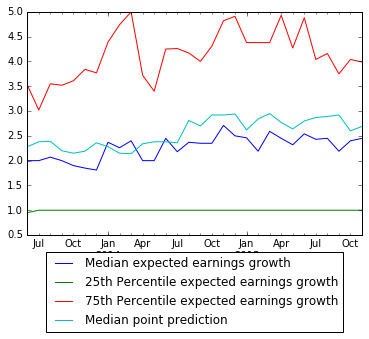

In [11]:
results = data_results.set_index(keys='Month', drop=True)
results.plot().legend(loc='upper center', bbox_to_anchor=(0.5, -0.05))

The 25th Percentile expected earnings growth is 1.0 for all months surveyed except for the first month. I'm not entirely certain why this is the case - there must be a constraint on the survey response.

Viewing histograms of the median and median point prediction shows that over the period from June 2013 through November 2015, asking someone an open ended "How much do you anticipate your income to increase by?" and recording the numeric response results similarly bounded responses compared to if they are given a pecent range options. 

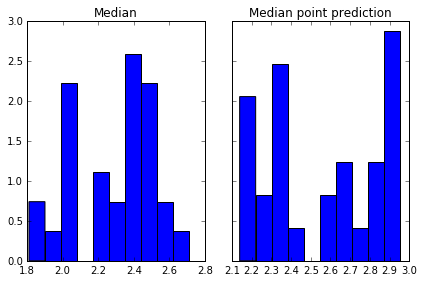

In [12]:
n_bins = 10

fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True)
ax0, ax1 = axes.flat

ax0.hist(data_results['Median expected earnings growth'], n_bins, normed=1, histtype='bar')
ax0.set_title('Median')

ax1.hist(data_results['Median point prediction'], n_bins, normed=1, histtype='bar')
ax1.set_title('Median point prediction')

plt.tight_layout()

plt.show()

One would intuitively expect income growth expectations to vary based on demographic information. An early-career professional with a college degree should expect their income to increase, a late-career respondent with less education should expect their income growth to be lower. The FRBNY survey includes several demographic data categories that allow these assumptions to be tested.

This is demonstrated in the median income change time series below. 

In [13]:
data_results_demo2 = data_results_demo.set_index(keys='Month', drop=True)

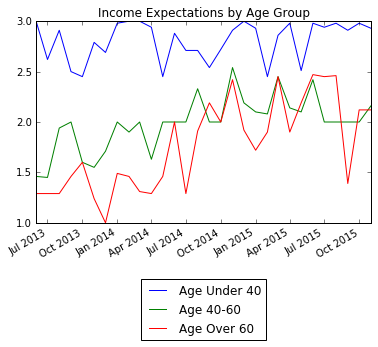

In [14]:
fig, ax = plt.subplots(1)

ax.plot(data_results_demo2[['Age Under 40', 'Age 40-60', 'Age Over 60']])
ax.set_title('Income Expectations by Age Group')
ax.legend(data_results_demo2[['Age Under 40', 'Age 40-60', 'Age Over 60']], loc='upper center', bbox_to_anchor=(0.5, -0.25))
fig.autofmt_xdate()

plt.show()

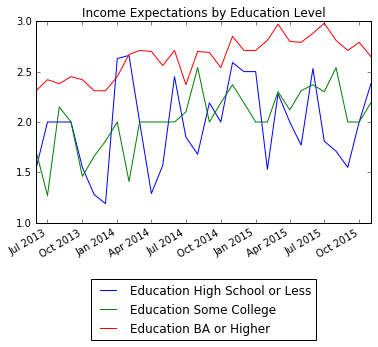

In [15]:
fig, ax = plt.subplots(1)

ax.plot(data_results_demo2[['Education High School or Less', 'Education Some College', 'Education BA or Higher']])
ax.set_title('Income Expectations by Education Level')
ax.legend(data_results_demo2[['Education High School or Less', 'Education Some College', 'Education BA or Higher']], loc='upper center', bbox_to_anchor=(0.5, -0.25))
fig.autofmt_xdate()

plt.show()

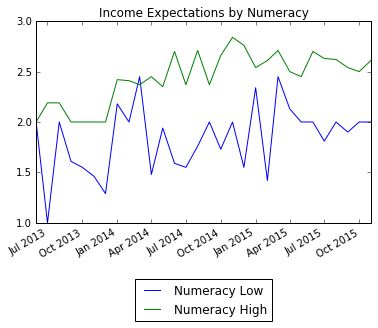

In [16]:
fig, ax = plt.subplots(1)

ax.plot(data_results_demo2[['Numeracy Low', 'Numeracy High']])
ax.set_title('Income Expectations by Numeracy')
ax.legend(data_results_demo2[['Numeracy Low', 'Numeracy High']], loc='upper center', bbox_to_anchor=(0.5, -0.25))
fig.autofmt_xdate()

plt.show()


### 5. What sort of dollar-amount increase do respondents expect?

In finance and economics, data presented as a percentage or summary statistic is ubiquitous. This is of course the proper way to deal with data in aggregate. However, economics is all about thinking "on the margin" - the cost or benefit of each additional unit of something isn't constant, it depends on the context of how much you already have. A dollar means much more to the person with just a few dollars to their name compared to someone will thousands in the bank.

So, when you ask a respondent what percentage they expect their income to increase by, what dollar amount does that imply? To answer this, I used the upper bound category in Question 47 (Q47) that asks which 'bucket' the respondent's income falls in, multiplied by the percentage change they expect their income to change by. 

Income expectations are based on 'Q25v2part2', change in household income. 

In [17]:
income = {1:10000, 2:19999, 3:29999, 4:39999, 5:49999, 6:59999, 7:74999, 8:99999, 9:149999, 10:199999, 11:200000}

In [18]:
income_exp_dollars = microdata[['Month' , 'Q25v2part2', 'Q47']].dropna()
income_exp_dollars['Q47'].replace(income, inplace=True)

In [19]:
income_exp_dollars['Q25v2part2'] = income_exp_dollars['Q25v2part2']/100
income_exp_dollars['Dollar'] = income_exp_dollars['Q25v2part2']*income_exp_dollars['Q47']
income_exp_dollars = income_exp_dollars.set_index(keys='Month', drop=True)

In [20]:
dollars = income_exp_dollars.resample(rule="M",how="mean")

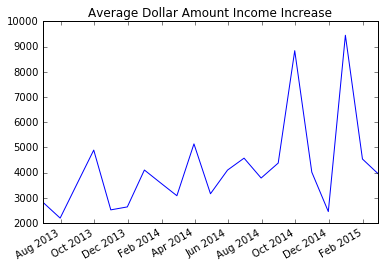

In [21]:
fig, ax = plt.subplots(1)
ax.plot(dollars['Dollar'])
fig.autofmt_xdate()
ax.set_title('Average Dollar Amount Income Increase')
plt.show()

### 6. What can scikit-learn do with the Survey Microdata?

Scikit-learn is the most popular machine learning module for Python. The FRBNY microdata contains a mix of numeric and categorical columns, with each row representing a different observation. This seems like it would be a great dataset to try out some Scikit-learn tools. 

Here, I use an unsupervised machine learning technique, K-Means clustering, to explore the relationship between some survey questions (variables) and the respondent's income expectations. 

The FRBNY's Survey of Consumer Expectations includes 49 questions with complex responses. I selected some of the more straightforward questions to compare here. 

Q25v2part2 - expected change in household income  
Q32 - current age  
Q47 - Total combined pretax income
Q36 - Highest level of education completed, here limited to Bachelors, Masters, Doctoral, and Professional. 

In [39]:
income_expectations = microdata[['Q25v2part2', 'Q32', 'Q47', 'Q36']].dropna()
income_expectations = income_expectations[income_expectations['Q25v2part2']<500]
income_expectations = income_expectations[income_expectations['Q25v2part2']>-500]
income_expectations = income_expectations[income_expectations['Q32']<90]
income_expectations['Q47'].replace(income, inplace=True)
income_expectations = income_expectations.loc[income_expectations['Q36'].isin([5,6,7,8])]

In [40]:
income_expectations.head()

,Q25v2part2,Q32,Q47,Q36
1,5,65,200000,5
7,-10,67,39999,6
8,-20,67,39999,6
9,0,67,39999,6
10,-10,67,39999,6


First, the relationship between income expectatons (Y) and age (X) is shown:

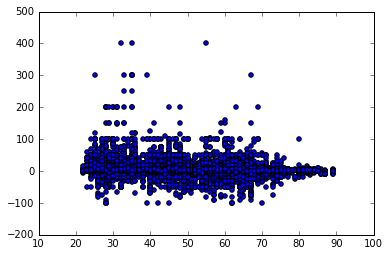

In [24]:
plt.scatter(income_expectations['Q32'], income_expectations['Q25v2part2']) 

Then, income expectations and income bucket:

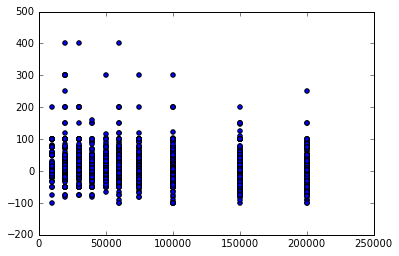

In [25]:
plt.scatter(income_expectations['Q47'], income_expectations['Q25v2part2'])

In [41]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [42]:
# Convert DataFrame to matrix
mat = income_expectations.as_matrix()

mat = StandardScaler().fit_transform(mat)
# Using sklearn
km = sklearn.cluster.KMeans(n_clusters=3)
km.fit(mat)
# Get cluster assignment labels
labels = km.labels_
# Format results as a DataFrame
results = pd.DataFrame([income_expectations.index,labels]).T

In [43]:
income_expectations_cluster = income_expectations
income_expectations_cluster['cluster'] = results[1]
income_expectations_cluster.head()

,Q25v2part2,Q32,Q47,Q36,cluster
1,5,65,200000,5,2
7,-10,67,39999,6,1
8,-20,67,39999,6,1
9,0,67,39999,6,1
10,-10,67,39999,6,1


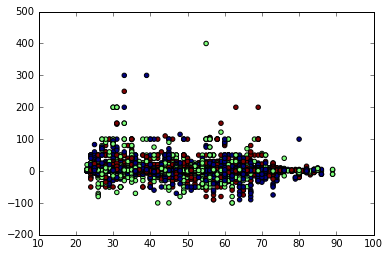

In [44]:
plt.scatter(income_expectations_cluster['Q32'], income_expectations_cluster['Q25v2part2'], c=income_expectations_cluster['cluster']) 

This doesn't produce a discernable result! However, with more analysis work the method could prove useful. 